In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## 1) Suno Research

In [2]:
ticker = 'bbas3'

with open(f'../src/crawlers/suno/results/suno-{ticker}.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_suno = pd.DataFrame(data)

In [3]:
# Convert date to datetime format
df_suno['date'] = pd.to_datetime(df_suno['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_suno.set_index('date', inplace=True)

# Order by date
df_suno.sort_index(inplace=True)

In [4]:
df_suno.head(5)

,topic,title,search_date,url,tags
date,,,,,
2018-09-24 12:21:00,Finanças Pessoais,Tesouro Direto não terá mais taxa de custódia ...,2022-05-03 17:12:32,https://www.suno.com.br/noticias/santander-bb-...,"[Banco do Brasil (BBAS3), Renda Fixa, Santande..."
2018-10-03 11:47:00,Economia,Petrobras retorna ao posto de empresa mais val...,2022-05-03 17:12:19,https://www.suno.com.br/noticias/petrobras-emp...,"[Banco do Brasil (BBAS3), BB Seguridade (BBSE3..."
2018-10-03 17:29:00,Política,XP elenca ações que se beneficiam com a ascens...,2022-05-03 17:12:13,https://www.suno.com.br/noticias/xp-pesquisa-e...,"[Banco do Brasil (BBAS3), Petrobras (PETR4)]"
2018-10-08 12:24:00,Mercado,Ações de estatais tem alta em meio ao resultad...,2022-05-03 17:12:06,https://www.suno.com.br/noticias/acoes-de-esta...,"[Banco do Brasil (BBAS3), Bolsa de Valores, Ce..."
2018-10-10 09:28:00,Política,MPF abre investigação contra Paulo Guedes sob ...,2022-05-03 17:12:47,https://www.suno.com.br/noticias/mpf-investiga...,"[Banco do Brasil (BBAS3), Correios, Eleições, ..."


In [5]:
df_suno.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2018-09-24 12:21:00 to 2022-04-27 16:22:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   topic        484 non-null    object
 1   title        484 non-null    object
 2   search_date  484 non-null    object
 3   url          484 non-null    object
 4   tags         484 non-null    object
dtypes: object(5)
memory usage: 22.7+ KB


c:\Users\mathe\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


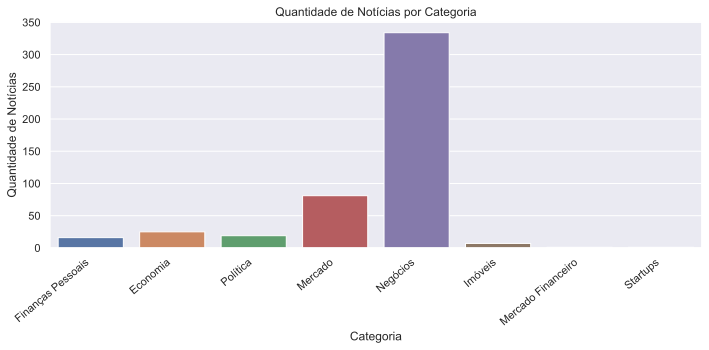

In [6]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_suno['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Quantidade de Notícias por Categoria')
plt.ylabel('Quantidade de Notícias')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show()

In [7]:
df_suno['topic'].value_counts()

Negócios              334
Mercado                81
Economia               25
Política               19
Finanças Pessoais      16
Imóveis                 7
Mercado Financeiro      1
Startups                1
Name: topic, dtype: int64

In [8]:
print ('Suno Research')

# Number of news per year
for year in range (2018, 2023):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_suno.loc[start_date:end_date].shape[0]))

Suno Research
Notícias em 2018: 12
Notícias em 2019: 118
Notícias em 2020: 112
Notícias em 2021: 194
Notícias em 2022: 48


In [9]:
print (f"Número Máximo de Notícias no Dia: {df_suno.resample('D').topic.count().max()}")
print (f"Número Mínimo de Notícias no Dia: {df_suno.resample('D').topic.count().min()}")
print (f"Número Médio de Notícias no Dia: {df_suno.resample('D').topic.count().mean()}")

Número Máximo de Notícias no Dia: 7
Número Mínimo de Notícias no Dia: 0
Número Médio de Notícias no Dia: 0.36890243902439024


<AxesSubplot:xlabel='date'>

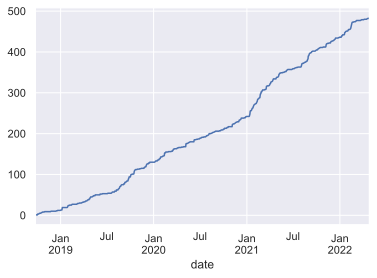

In [10]:
df_suno.resample('D').topic.count().cumsum().plot()

---

## 2. Infomoney

In [11]:
with open(f'../src/crawlers/infomoney/results/infomoney-results.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_infomoney= pd.DataFrame(data)

In [12]:
# Convert date to datetime format
df_infomoney['date'] = pd.to_datetime(df_infomoney['date'], format='%Y-%m-%d %H:%M:%S')

# Set date column as index
df_infomoney.set_index('date', inplace=True)

# Order by date
df_infomoney.sort_index(inplace=True)

In [13]:
df_infomoney.sample(5)

,topic,title,search_date,link,tags
date,,,,,
2021-08-23 11:39:31,politica,"Com impeachment de Moraes, Bolsonaro pressiona...",2022-05-06 18:34:18,https://www.infomoney.com.br/politica/com-impe...,"[Política, Alexandre de Moraes, Centrão, Ciro ..."
2022-03-11 14:44:14,mercados,Bolsa brasileira volta a fechar às 17h a parti...,2022-05-06 15:38:30,https://www.infomoney.com.br/mercados/bolsa-br...,"[Mercados, Ações, B3, Bolsa, Nova York]"
2022-02-24 19:18:11,mercados,"Americanas (AMER3) vê lucro crescer 20,5% na b...",2022-05-06 15:52:48,https://www.infomoney.com.br/mercados/american...,"[Mercados, Americanas, Temporada de Balanços, ..."
2021-09-30 18:41:49,onde-investir,“Ainda não estamos vendo o movimento que gosta...,2022-05-06 18:00:51,https://www.infomoney.com.br/onde-investir/ain...,"[Onde Investir, FII Talks, Turismo, Vacinação]"
2022-02-09 10:03:55,mercados,XP reduz preço-alvo para Magazine Luiza (MGLU3...,2022-05-06 16:11:10,https://www.infomoney.com.br/mercados/xp-reduz...,"[Mercados, Onde Investir, Ações, Americanas, E..."


c:\Users\mathe\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


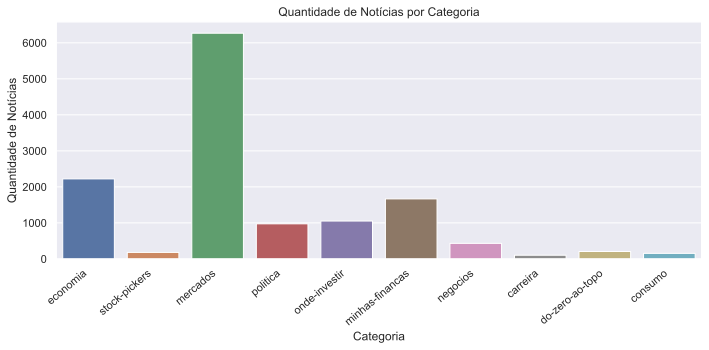

In [14]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_infomoney['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Quantidade de Notícias por Categoria')
plt.ylabel('Quantidade de Notícias')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show()

In [15]:
print ('Infomoney')

# Number of news per year
for year in range (2018, 2023):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_infomoney.loc[start_date:end_date].shape[0]))

Infomoney
Notícias em 2018: 0
Notícias em 2019: 0
Notícias em 2020: 0
Notícias em 2021: 8381
Notícias em 2022: 4875


In [16]:
print (f"Número Máximo de Notícias no Dia: {df_infomoney.resample('D').topic.count().max()}")
print (f"Número Mínimo de Notícias no Dia: {df_infomoney.resample('D').topic.count().min()}")
print (f"Número Médio de Notícias no Dia: {df_infomoney.resample('D').topic.count().mean()}")

Número Máximo de Notícias no Dia: 88
Número Mínimo de Notícias no Dia: 1
Número Médio de Notícias no Dia: 36.417582417582416


<AxesSubplot:xlabel='date'>

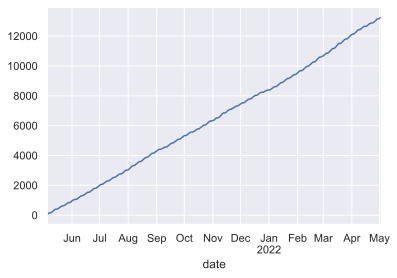

In [17]:
df_infomoney.resample('D').topic.count().cumsum().plot()

---

## 3. MoneyTimes

In [18]:
ticker = 'petr4'

with open(f'../src/crawlers/moneytimes/results/moneytimes-{ticker}.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_moneytimes = pd.DataFrame(data)
df_moneytimes

,topic,title,date,search_date,link,tags
0,Mercados,Ibovespa dispara hoje por quê? Inflação no Bra...,11/05/2022 - 12:14,2022-05-11 19:03:09,https://www.moneytimes.com.br/ibovespa-dispara...,"[Ações, Alimentos, Ativa Investimentos, B3, Bo..."
1,Combustíveis,"Defasagem do diesel cai para 17% após aumento,...",10/05/2022 - 13:40,2022-05-11 19:03:17,https://www.moneytimes.com.br/defasagem-do-die...,"[Amazonas, Bahia, Combustíveis, Diesel, Estadã..."
2,Carteira Recomendada,"Adeus, Ibovespa: 5 ações do BB Investimentos p...",08/05/2022 - 17:18,2022-05-11 19:03:22,https://www.moneytimes.com.br/adeus-ibovespa-5...,"[Ações, Alpargatas, BB Investimentos, Bradesco..."
3,Política,Setor de etanol não se surpreenderá se após Al...,11/05/2022 - 11:57,2022-05-11 19:03:22,https://www.moneytimes.com.br/setor-de-etanol-...,"[Agro Times, Bento Albuquerque, Etanol, Jair B..."
4,Petróleo,EUA perguntaram se Petrobras poderia aumentar ...,10/05/2022 - 8:23,2022-05-11 19:03:22,https://www.moneytimes.com.br/eua-perguntaram-...,"[Bento Albuquerque, Brasil, Combustíveis, Comm..."
...,...,...,...,...,...,...
6124,George Soros,George Soros volta a comprar ação da Petrobras...,23/11/2016 - 12:22,2022-05-11 21:19:57,https://www.moneytimes.com.br/george-soros-vol...,"[George Soros, Petrobras]"
6125,Comprar ou vender?,"Petrobras deve aumentar gasolina em breve, diz...",02/12/2016 - 18:32,2022-05-11 21:19:57,https://www.moneytimes.com.br/petrobras-deve-a...,"[Comprar ou vender?, Itaú BBA, Opep, Petrobras]"
6126,Comprar ou vender?,XP recoloca Petrobras em carteira recomendada,21/11/2016 - 19:55,2022-05-11 21:20:00,https://www.moneytimes.com.br/xp-recoloca-petr...,"[Comprar ou vender?, Petrobras, XP Investimentos]"
6127,Benndorf,Petrobras: Dia é decisivo para tendência de al...,01/12/2016 - 11:59,2022-05-11 21:20:00,https://www.moneytimes.com.br/petrobras-dia-e-...,"[Benndorf, Bolsa, Comprar ou vender?, Petrobras]"


In [19]:
# Convert date to datetime format
df_moneytimes['date'] = pd.to_datetime(df_moneytimes['date'], format='%d/%m/%Y - %H:%M')

# Set date column as index
df_moneytimes.set_index('date', inplace=True)

# Order by date
df_moneytimes.sort_index(inplace=True)

In [20]:
df_moneytimes.head()

,topic,title,search_date,link,tags
date,,,,,
2016-09-21 00:31:00,Comprar ou vender?,"Petrobras: Menos é mais, assim como nos casame...",2022-05-11 21:19:43,https://www.moneytimes.com.br/petrobras-menos-...,"[Comprar ou vender?, Petrobras, Petróleo]"
2016-11-02 04:53:00,BB Investimentos,As 5 apostas do BB Investimentos para novembro,2022-05-11 21:19:38,https://www.moneytimes.com.br/as-5-apostas-do-...,"[BB Investimentos, Bolsa, Comprar ou vender?, ..."
2016-11-02 15:04:00,Petrobras,Projeção nada boa para Petrobras na volta do f...,2022-05-11 21:19:32,https://www.moneytimes.com.br/projecao-nada-bo...,"[Petrobras, Petróleo]"
2016-11-08 18:55:00,Donald Trump,Como a Petrobras pode ganhar com Hillary,2022-05-11 21:19:26,https://www.moneytimes.com.br/como-a-petrobras...,"[Donald Trump, Hillary Clinton, Petrobras, Pet..."
2016-11-21 12:52:00,Comprar ou vender?,Quer comprar ação da Petrobras? Passa lá no po...,2022-05-11 21:20:03,https://www.moneytimes.com.br/quer-comprar-aca...,"[Comprar ou vender?, Fusões & Aquisições, Petr..."


In [21]:
df_moneytimes.sample(5)

,topic,title,search_date,link,tags
date,,,,,
2020-06-25 16:38:00,Empresas,Petrobras e Sebrae oferecem R$ 10 milhões para...,2022-05-11 20:14:27,https://www.moneytimes.com.br/petrobras-e-sebr...,"[Inovação, Microempreendedor, Petrobras, Sebra..."
2021-12-22 09:05:00,Empresas,Dividendos das empresas brasileiras vão aument...,2022-05-11 19:23:32,https://www.moneytimes.com.br/dividendos-das-e...,"[Banco Inter, Bancos, Dividendos, Empresas, Pe..."
2019-10-14 19:53:00,Política,"Senado votará cessão onerosa na terça-feira, d...",2022-05-11 20:35:10,https://www.moneytimes.com.br/senado-votara-ce...,"[Economia, Estados, Fernando Bezerra, Jair Bol..."
2021-01-08 19:25:00,Combustíveis,Importador de combustível diz que Petrobras te...,2022-05-11 19:59:17,https://www.moneytimes.com.br/importador-de-co...,"[ANP, Cade, Combustíveis, Commodities, Diesel,..."
2020-07-03 14:59:00,Empresas,"Ainda fracas, vendas de combustíveis no país e...",2022-05-11 20:14:42,https://www.moneytimes.com.br/ainda-fracas-ven...,"[ANP, Biocombustível, Cana-de-Açúcar, Combustí..."


c:\Users\mathe\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


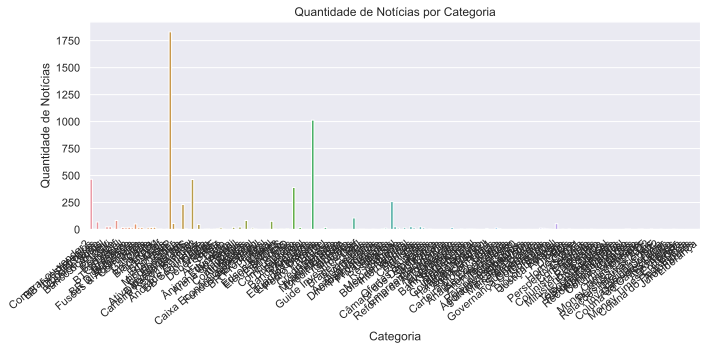

In [22]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_moneytimes['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Quantidade de Notícias por Categoria')
plt.ylabel('Quantidade de Notícias')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show();

In [23]:
print ('MoneyTimes')

# Number of news per year
for year in range (2018, 2023):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_moneytimes.loc[start_date:end_date].shape[0]))

MoneyTimes
Notícias em 2018: 737
Notícias em 2019: 1073
Notícias em 2020: 1249
Notícias em 2021: 1675
Notícias em 2022: 866


In [24]:
print (f"Número Máximo de Notícias no Dia: {df_moneytimes.resample('D').topic.count().max()}")
print (f"Número Mínimo de Notícias no Dia: {df_moneytimes.resample('D').topic.count().min()}")
print (f"Número Médio de Notícias no Dia: {df_moneytimes.resample('D').topic.count().mean()}")

Número Máximo de Notícias no Dia: 29
Número Mínimo de Notícias no Dia: 0
Número Médio de Notícias no Dia: 2.9766877124817874


<AxesSubplot:xlabel='date'>

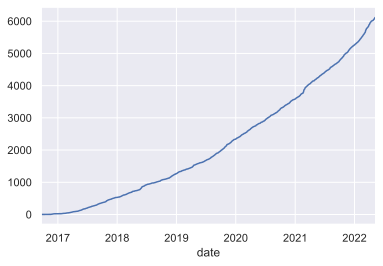

In [25]:
df_moneytimes.resample('D').topic.count().cumsum().plot()

---

## 4. Twitter

In [26]:
with open('../src/crawlers/twitter/results/infomoney.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_twitter = pd.DataFrame(data)

In [27]:
df_twitter.head()

,tweet_id,created_at,search_dt,text,user_id,screen_name,rt_count,favorite_count
0,1521540488398049280,2022-05-03 14:21:35,2022-05-03 14:37:15,Pesquisas internas mostram crescimento de Lula...,59773459,infomoney,1,9
1,1521536241698811904,2022-05-03 14:04:43,2022-05-03 14:37:15,TSE cancela convite para UE observar eleições ...,59773459,infomoney,0,5
2,1521531884563480576,2022-05-03 13:47:24,2022-05-03 14:37:15,PT começa a estruturar comando da campanha de ...,59773459,infomoney,0,5
3,1521526203231969282,2022-05-03 13:24:50,2022-05-03 14:37:15,"Ministro vê “luta difícil” para Plano Safra, m...",59773459,infomoney,1,4
4,1521521548485668865,2022-05-03 13:06:20,2022-05-03 14:37:15,Amazon Prime: preço da assinatura é reajustado...,59773459,infomoney,0,8


In [28]:
# Convert date to datetime format
df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'], format='%Y-%m-%d %H:%M:%S')

# Set date column as index
df_twitter.set_index('created_at', inplace=True)

# Order by date
df_twitter.sort_index(inplace=True)

In [29]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3209 entries, 2022-02-02 22:32:23 to 2022-05-03 14:21:35
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        3209 non-null   object
 1   search_dt       3209 non-null   object
 2   text            3209 non-null   object
 3   user_id         3209 non-null   object
 4   screen_name     3209 non-null   object
 5   rt_count        3209 non-null   int64 
 6   favorite_count  3209 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 200.6+ KB


In [30]:
df_twitter.tail()

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-05-03 13:06:20,1521521548485668865,2022-05-03 14:37:15,Amazon Prime: preço da assinatura é reajustado...,59773459,infomoney,0,8
2022-05-03 13:24:50,1521526203231969282,2022-05-03 14:37:15,"Ministro vê “luta difícil” para Plano Safra, m...",59773459,infomoney,1,4
2022-05-03 13:47:24,1521531884563480576,2022-05-03 14:37:15,PT começa a estruturar comando da campanha de ...,59773459,infomoney,0,5
2022-05-03 14:04:43,1521536241698811904,2022-05-03 14:37:15,TSE cancela convite para UE observar eleições ...,59773459,infomoney,0,5
2022-05-03 14:21:35,1521540488398049280,2022-05-03 14:37:15,Pesquisas internas mostram crescimento de Lula...,59773459,infomoney,1,9


<AxesSubplot:xlabel='created_at'>

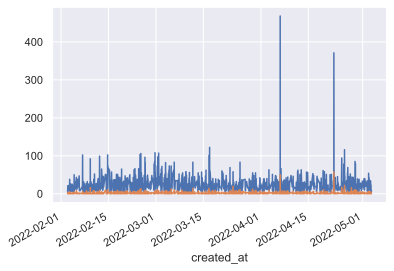

In [31]:
df_twitter.favorite_count.plot()
df_twitter.rt_count.plot()

In [32]:
df_twitter.query('favorite_count == favorite_count.max()')

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-04-06 16:15:57,1511784797378682892,2022-05-03 14:37:18,Touro futurista em referência ao Bitcoin é ina...,59773459,infomoney,50,468


In [33]:
df_twitter.query('rt_count == rt_count.max()')

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-04-22 12:36:00,1517527648464949248,2022-05-03 14:37:15,Quanto de Imposto de Renda o vencedor do BBB p...,59773459,infomoney,57,371


---